In [1]:
import pandas as pd 

df_classwise=pd.read_csv("/kaggle/input/classwise-balanced-ciciot-2023/ClassWise_Labeled_Balanced_Dataset.csv")
df_binary_Normal=pd.read_csv("/kaggle/input/binary-classified-ciciot-2023-dataset/Normal_baised_data.csv")
df_perfect_binary=pd.read_csv("/kaggle/input/binary-classified-ciciot-2023-dataset/EqualBinaryData_CICIoT_2023.csv")
df_attack_bairds=pd.read_csv("/kaggle/input/binary-classified-ciciot-2023-dataset/Attack_baised_data.csv")

<h3>For Normal_Baised_data.csv : DecisionTreeClassifier got highest accuracy 94% on this parameters(max_depth=20,min_samples_split=20,random_state=42).
</h3>
<br>

<h3>For EqualBinaryData_CICIoT_2023.csv : DecisionTreeClassifier got highest 99.7% with checking the overfitting validtions</h3>

In [2]:

#for Normal_baised_data.csv
# df=pd.DataFrame(df_binary_Normal)

#For Perfect binary 
df=pd.DataFrame(df_perfect_binary)

#For Multi class
# df=pd.DataFrame(df_classwise)


In [3]:
import numpy as np
df['Label'].value_counts()

Label
1    597912
0    597912
Name: count, dtype: int64

# Binary Data

# Preprocessing

<h3>For multi class Target Labels</h3>

In [4]:
from sklearn.preprocessing import LabelEncoder
LB=LabelEncoder()


In [5]:
df.isnull().sum()

Unnamed: 0          0
Header_Length       0
Protocol Type       0
Time_To_Live        0
Rate                0
fin_flag_number     0
syn_flag_number     0
rst_flag_number     0
psh_flag_number     0
ack_flag_number     0
ece_flag_number     0
cwr_flag_number     0
ack_count           0
syn_count           0
fin_count           0
rst_count           0
HTTP                0
HTTPS               0
DNS                 0
Telnet              0
SMTP                0
SSH                 0
IRC                 0
TCP                 0
UDP                 0
DHCP                0
ARP                 0
ICMP                0
IGMP                0
IPv                 0
LLC                 0
Tot sum             0
Min                 0
Max                 0
AVG                 0
Std                53
Tot size            0
IAT                 0
Number              0
Variance           53
Label               0
dtype: int64

In [6]:
(np.isinf(df['Rate'])).value_counts()

Rate
False    1195768
True          56
Name: count, dtype: int64

<h2>Imputer cannot handle the infinite values in the dataset 

In [7]:
# from sklearn.impute import SimpleImputer
# impute=SimpleImputer(strategy='mean')
# test=df.copy()
# test=test.select_dtypes(include='number')
# impute.fit_transform(test)

We will replace the infinite with null values and just drop the null values as they are very few.

In [8]:
df=df.replace(np.inf,np.nan)
(np.isinf(df['Rate'])).value_counts()
df.isnull().sum()

Unnamed: 0          0
Header_Length       0
Protocol Type       0
Time_To_Live        0
Rate               56
fin_flag_number     0
syn_flag_number     0
rst_flag_number     0
psh_flag_number     0
ack_flag_number     0
ece_flag_number     0
cwr_flag_number     0
ack_count           0
syn_count           0
fin_count           0
rst_count           0
HTTP                0
HTTPS               0
DNS                 0
Telnet              0
SMTP                0
SSH                 0
IRC                 0
TCP                 0
UDP                 0
DHCP                0
ARP                 0
ICMP                0
IGMP                0
IPv                 0
LLC                 0
Tot sum             0
Min                 0
Max                 0
AVG                 0
Std                53
Tot size            0
IAT                 0
Number              0
Variance           53
Label               0
dtype: int64

In [9]:
df=df.dropna()
df.isnull().sum()


Unnamed: 0         0
Header_Length      0
Protocol Type      0
Time_To_Live       0
Rate               0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IGMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Variance           0
Label              0
dtype: int64

<h2>Decision Tree With</h2>

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [11]:
df=df.sample(frac=1,random_state=42)


In [12]:
df.reset_index(drop=True,inplace=True)

In [13]:
X=df.drop('Label',axis=1)
y=df['Label']
# y_encoded=LB.fit_transform(y)


In [14]:
# y_encoded=pd.DataFrame(y_encoded)
# y_encoded.value_counts()

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [16]:
min_sp=[5,10,15,20,25,30,35]
max_dp=[5,10,15,20,25,30,35]

In [17]:
DT=DecisionTreeClassifier(max_depth=5,min_samples_split=10,random_state=42)
check=DT.fit(X_train,y_train)


In [18]:
y_pre=DT.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pre))

print("Classification report:\n",classification_report(y_test,y_pre))

Accuracy: 0.9967050519748781
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    119420
           1       0.99      1.00      1.00    119734

    accuracy                           1.00    239154
   macro avg       1.00      1.00      1.00    239154
weighted avg       1.00      1.00      1.00    239154



Confusion Matrix (Counts):
                  Predicted Intrusion  Predicted Normal
Actual Intrusion               118654               766
Actual Normal                      22            119712


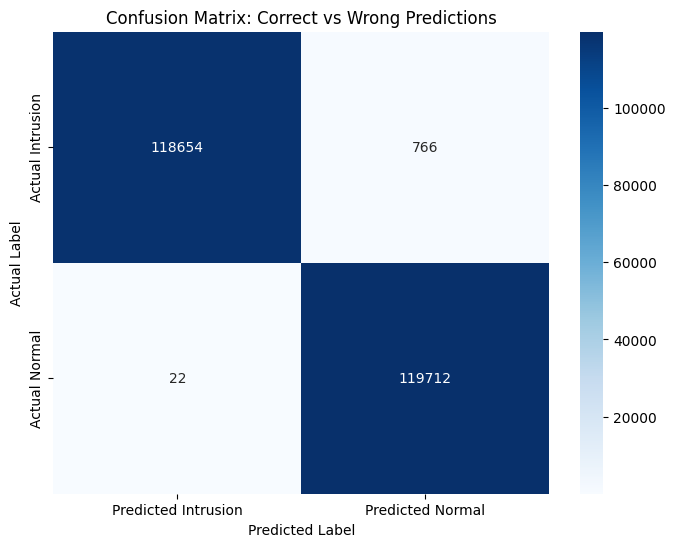

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pre)

cm_df = pd.DataFrame(cm, index=['Actual Intrusion', 'Actual Normal'], 
                         columns=['Predicted Intrusion', 'Predicted Normal'])

print("Confusion Matrix (Counts):")
print(cm_df)


plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Correct vs Wrong Predictions')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

<h2>Validating accuracy:</h2>

<h3>Train and Test accuracy comparision</h3>

In [20]:
#Test data
test=df_perfect_binary.sample(n=1000,random_state=42)
test['Label'].value_counts()
X_test = test.drop('Label', axis=1)
y_test = test['Label']
train_preds=DT.predict(X_train)
test_preds=DT.predict(X_test)
train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")
print(f"Difference:        {train_acc - test_acc:.4f}")

if train_acc > 0.99 and (train_acc - test_acc) > 0.05:
    print("\nDIAGNOSIS: High probability of OVERFITTING.")
elif train_acc < 0.80:
    print("\nDIAGNOSIS: Likely UNDERFITTING (Model is too simple).")
else:
    print("\nDIAGNOSIS: Good Fit (Generalized well).")
    


Training Accuracy: 0.9968
Testing Accuracy:  0.9940
Difference:        0.0028

DIAGNOSIS: Good Fit (Generalized well).


<h2>Cross Validation:</h2>

In [21]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DT, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

if scores.std() > 0.03:
    print("\nWarning: High variance. Model is unstable (Overfitting).")
else:
    print("\nModel is stable.")

Cross-Validation Scores: [0.99672596 0.99651271 0.99686395 0.99687648 0.99679703]
Mean Accuracy: 0.9968
Standard Deviation: 0.0001

Model is stable.


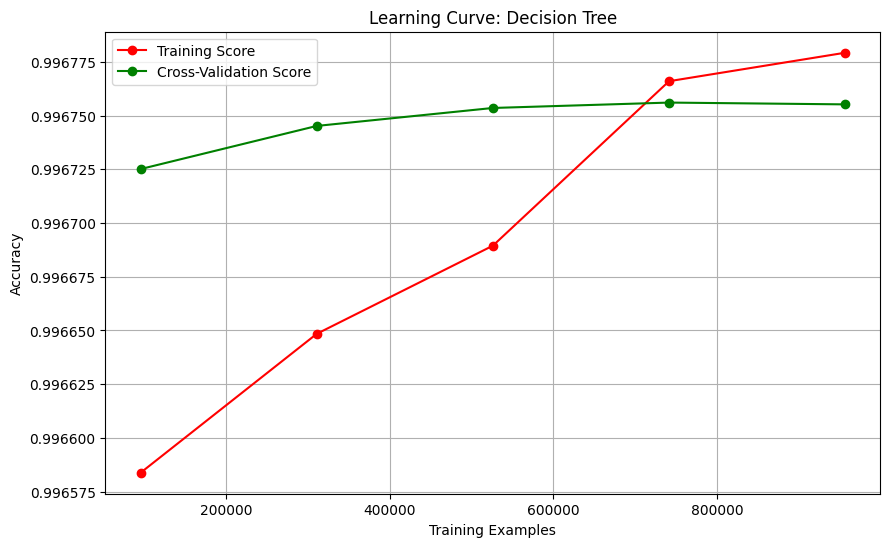

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 5) # Check at 10%, 30%, ... 100% of data
    )
    
    # Calculate means
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-Validation Score")
    
    plt.title("Learning Curve: Decision Tree")
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()


plot_learning_curve(DT, X, y)

<h2>Model Saving</h2>

In [23]:
test['Label'].value_counts()

Label
0    532
1    468
Name: count, dtype: int64

In [24]:
# import joblib

# # joblib.dump(DT,"/kaggle/working/MultiClass_DTC.joblib")
# joblib.dump(DT,"/kaggle/working/Binary_Classifier_DTC.joblib")


In [25]:
# df=df[df['Label']!='Normal']

In [26]:
# # df.fillna({'Variance':df['Variance'].mean()},inplace=True)
# df.fillna({'Std':df['Std'].mean()},inplace=True)

In [27]:
from sklearn.metrics import roc_auc_score

# Get probability scores (not just 0 or 1 labels)
y_probs = DT.predict_proba(X_test)[:, 1] 

# Calculate the score
auc_score = roc_auc_score(y_test, y_probs)
print(f"My Decision Tree AUC: {auc_score:.3f}")

My Decision Tree AUC: 0.994


Loading Model & Data...

--- 1. Evaluating Overall Performance (Fig 11) ---
Accuracy:  0.9940 (Paper Baseline: ~99%)
Precision: 0.9941
Recall:    0.9940
F1-Score:  0.9940
FAR:       0.0113

--- 2. Confusion Matrix (Table 3) ---


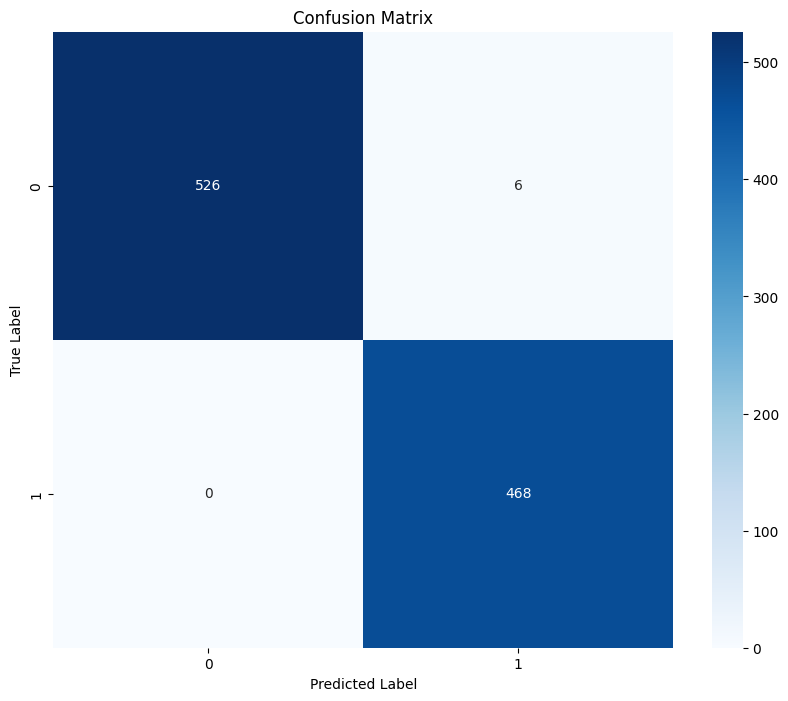


--- 3. ROC Curve (Fig 7 & 10) ---


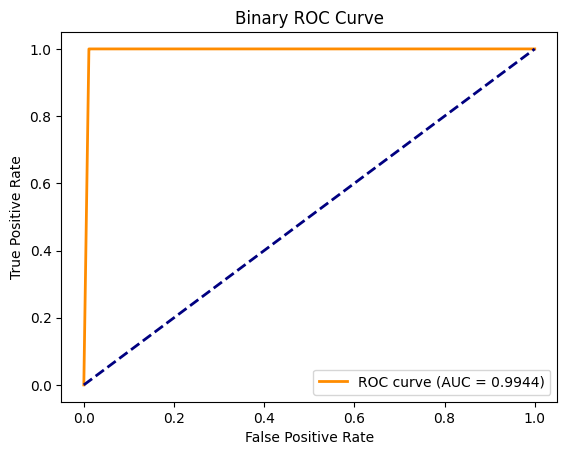

Binary AUC: 0.9944


In [28]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, classification_report
)
from sklearn.preprocessing import label_binarize

# --- Configuration ---
# MODEL_PATH = "decision_tree_model.joblib"
# Use your TEST dataset (not the one used for training!)
# TEST_DATA_PATH = "test_sample_1000.csv" 
# ---------------------

def calculate_far(y_true, y_pred):
    """Calculates False Alarm Rate (FAR) from Confusion Matrix"""
    # FAR = FP / (FP + TN)
    cm = confusion_matrix(y_true, y_pred)
    # For binary: cm[0,0]=TN, cm[0,1]=FP, cm[1,0]=FN, cm[1,1]=TP
    # For multi-class, we calculate average FAR or per-class FAR
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        return fp / (fp + tn) if (fp + tn) > 0 else 0.0
    else:
        # Macro-average FAR for multi-class
        fp = cm.sum(axis=0) - np.diag(cm)  
        cn = cm.sum(axis=1) - np.diag(cm)
        tn = cm.sum() - (fp + cn + np.diag(cm))
        return np.mean(fp / (fp + tn))

def plot_multiclass_roc(model, X_test, y_test, classes):
    """Plots ROC Curve for Multi-class (One-vs-Rest)"""
    y_test_bin = label_binarize(y_test, classes=classes)
    y_score = model.predict_proba(X_test)
    
    n_classes = len(classes)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    plt.figure(figsize=(10, 8))
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], lw=2,
                 label=f'{classes[i]} (AUC = {roc_auc[i]:.4f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-Class ROC Curve (Replicating Fig 10)')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

def main():
    print("Loading Model & Data...")
    # DT = joblib.load(MODEL_PATH)
    # df = pd.read_csv(TEST_DATA_PATH)
    
    X_test = test.drop('Label', axis=1)
    y_test = test['Label']
    
    print("\n--- 1. Evaluating Overall Performance (Fig 11) ---")
    y_pred = DT.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    far = calculate_far(y_test, y_pred)
    
    print(f"Accuracy:  {acc:.4f} (Paper Baseline: ~99%)")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"FAR:       {far:.4f}")

    print("\n--- 2. Confusion Matrix (Table 3) ---")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=DT.classes_, yticklabels=DT.classes_)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    print("\n--- 3. ROC Curve (Fig 7 & 10) ---")
    if len(DT.classes_) == 2:
        # Binary ROC
        y_probs = DT.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_probs, pos_label=DT.classes_[1])
        roc_auc = auc(fpr, tpr)
        
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Binary ROC Curve')
        plt.legend(loc="lower right")
        plt.show()
        print(f"Binary AUC: {roc_auc:.4f}")
    else:
        # Multi-class ROC
        plot_multiclass_roc(DT, X_test, y_test, DT.classes_)

if __name__ == "__main__":
    main()

In [29]:

y_test


1141990    0
647474     0
706995     0
466529     1
1094279    0
          ..
519660     1
608464     0
28930      1
686114     0
549292     1
Name: Label, Length: 1000, dtype: int64